# Conceptual Questions

1. Explain when you would run a paired vs. unpaired statistical test. Is one test more powerful than the other? Give examples of experiments that would require one or the other.
  > Data is considered paired when they are observed from the same “subject.” Examples can include: before and after treatment (like pharmacology on neurons; drugs given to patients; experiences like sleep deprivation or training). Data is considered unpaired or two-sample when they are measured from different, independent “subjects.” Examples can include: males vs. females; control vs. experimental condition animals; young vs. old.
1. Compare and contrast the parametric t-test and non-parametric Wilcoxon-Mann-Whitney tests (the requirements, assumptions, key differences).
  > t-tests require/assume the following: (1) data is continuous, (2) data is normal (or at least the population it comes from is normal, (3) the data is a random sample of the population. The Wilcox-Mann-Whitney is the non-parametric version of a 2-sample t-test and can be used when the data is not normally distributed. Generally speaking, t-tests are more powerful than non-parametric tests (since you are relying on the assumption that the data is normal), however non-parametric tests require less assumptions.


# Problem 1: Example of 2-sample (unpaired) t-test
Data Introduction: Octopamine has been implicated in modulating feeding behaviors in both vertebrates and invertebrates. Pargyline has been shown to increase the levels of octopamine in the nervous system. The role of Pargyline in sucrose consumption was tested in blowflies. Two groups of blowfies were used in this study: one group was injected with Parglyine (n=295 flies) while the control group was injected with saline (n = 300 flies). The amount of sucrose consumed was then measured. [adapted from Samuels & Witmer, pg 220. Originally: Long & Murdock, PNAS 1983]

1. A two-sample t-test is the most appropriate test for this data set. Why?
  > We are comparing two different populations of flies: saline injected (control) and parglyine injected (experimental).
1. Load in the data set and visualize the two conditions as histograms. What can you say about the data? What are the means and standard deviations of the two groups?
  > The data definitely looks normal and mean of the parglyine animals is substantially higher than the mean of the saline animals
1. Visualize the data as box & whisker plots and bar graphs with standard deviations
1. Are the two groups statistically different? (try with a t-test)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
data = pd.read_csv('../../../data/fly_feeding.csv')
data.head()

,animal,measurement,feed_type,side,measurement_type
0,NaN,21.7,saline,NaN,sucrose_consumption
1,NaN,17.0,saline,NaN,sucrose_consumption
2,NaN,11.1,saline,NaN,sucrose_consumption
3,NaN,6.3,saline,NaN,sucrose_consumption
4,NaN,19.3,saline,NaN,sucrose_consumption


In [32]:
data['feed_type'].unique()

array(['saline', 'pargyline', 'saline_two', 'parglyine_w_yohimbine',
       'creatine_phosphate', 'feeding_type_1', 'feeding_type_2'], dtype=object)

First, show the distributions for feeding behavior under parglyine and saline

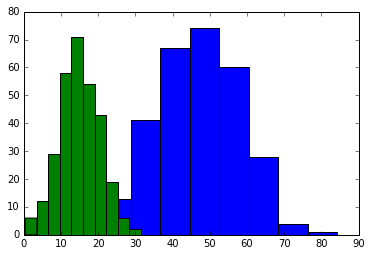

In [63]:
data_par = data.query('feed_type == "pargyline"')['measurement'].values
data_sal = data.query('feed_type == "saline"')['measurement'].values

fig, ax = plt.subplots()
ax.hist(data_par)
_ = ax.hist(data_sal)

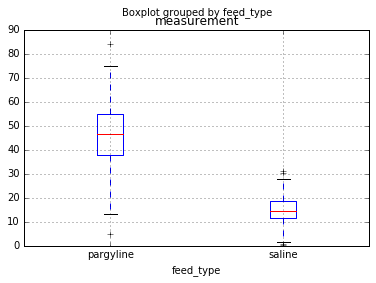

In [64]:
data.query('feed_type in ["pargyline", "saline"]').\
    boxplot('measurement', by='feed_type')

In [19]:
from scipy.stats import ttest_ind

In [29]:
res = ttest_ind(data_par, data_sal)
print(res)

Ttest_indResult(statistic=41.861017904148426, pvalue=3.3320050655092234e-179)


## Follow-up experiment
To further confirm octopamine positively modulates feeding behavior, an additional experiment was done with Yohimbine (an antagonist of octopamine receptors in insects). One group was injected with Parglyine and Yohimbine (n = 130) while an additional control group was injected with saline (n = 100). The amount of sucrose consumed was then measured.

1. Load in the data set and visualize the two conditions as histograms, box & whisker plot, and bar graphs with SD error bars.
```
	# load the data
E = read.delim("problem1E.txt", header = TRUE, fill = TRUE)
	# make the figure be two rows
	par(mfrow = c(4,1))
	# make the histograms
hist(E$saline2)
	hist(E$parglyine_yohimbine)
	# box & whisker
	boxplot(E)
	# bar graph
	E_mean = mean(E,na.rm=TRUE)
	E_sd = sd(E,na.rm=TRUE)
barx = barplot(E_mean)
	arrows(barx,E_mean-E_sd,barx,E_mean+E_sd, angle=90, code=3)
```
1. Are the two groups statistically different? (run t test)
1. Can you think of other, or better, experiments that can be done to test the role of octopamine in feeding regulation?
> Almost any answer is acceptable. Doing within-animal (or paired) experiment. Looking a the effects of Yohimbine along. Etc.


In [66]:
data_par_yoh = data.query('feed_type == "parglyine_w_yohimbine"')
data_par_yoh = data_par_yoh['measurement'].values

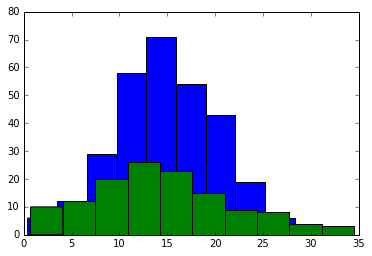

In [67]:
fig, ax = plt.subplots()
ax.hist(data_sal)
_ = ax.hist(data_par_yoh)

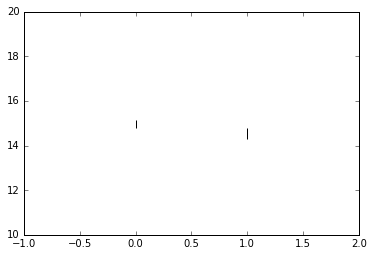

In [54]:
fig, ax = plt.subplots()
plt_data = [(data_sal, 'saline'), (data_par_yoh, 'par_yoh')]
for ii, (idata, nm) in enumerate(plt_data):
    mean = np.mean(idata)
    ste = idata.std() / np.sqrt(data.shape[0])
    ax.vlines(ii, mean - ste, mean + ste)
_ = plt.setp(ax, xlim=[-1, 2], ylim=[10, 20])

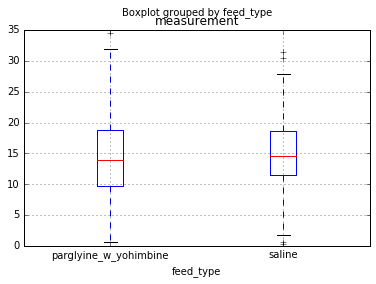

In [68]:
data_box = data.query('feed_type in ["parglyine_w_yohimbine", "saline"]')
data_box.boxplot('measurement', by='feed_type')

In [56]:
res = ttest_ind(data_sal, data_par_yoh)
print(res)

Ttest_indResult(statistic=0.66622501018272595, pvalue=0.50562622201652518)


## Problem 2: Example of paired t-test
Data Introduction: Certain types of nerve cells have the ability to regenerate a part of the cell that has been amputated. In an early study of this process, measurements were made on the nerves in the the spinal cord of rhesus monkeys. Nerves emanating from the left side of the cord were cut, while nerves from the right side were kept intact. During the regeneration process, the amount of creatine phosphate (CP) was measured in the left and right portions of the spinal cord. You are interested in whether CP levels are different between the cut and control sides of the spinal cord. [adapted from Samuels & Witmer, pg 387. Originally: Bodian (1947)]

1. Let’s say a paired t-test is the most appropriate test for this data set. What assumptions are we making?
  > Two major ones: CP levels are normally distributed and the observations came from a single animal/spinal cord.
1. Load in and visual the data (as a histogram, boxplot, and connecting pairs).

```
# load the data
CP = read.delim("problem2.txt", header = TRUE)
# rename the headers:
names(CP) = c(“animal”,”L”,”R”)
# make the figure be two rows
par(mfrow = c(4,1))
# make the histograms
hist(CP$R)
hist(CPg$L)
# boxplot
boxplot(CP)
# connected data 
stripchart(list(CP$R,CP$L),vertical=T,pch=16)
segments(c(1,1,1,1,1,1,1,1),CP$R,c(2,2,2,2,2,2,2,2),CP$L)
```
1. Is there a statistical difference in CP levels? (hint: run paired sample t.test)
  > Yes p = 0.031
1. What happens when you run a 2-sample t-test? Explain why you might see a difference in results between the 1-sample and 2-sample test.
  > The difference is no longer significant (p=0.165). Generally speaking, paired tests are more power (since an additional relationship is already assumed), and in particular work well for data with noisy baselines.
1. Paired t-tests are essentially one-sample t-tests. Paired t-tests takes the two measurements, subtracts them, and then runs a one-sample t-test testing if the mean is equal to zero. Try it out and compare your results!


In [ ]:
import statsmodels.api as sm
from scipy.stats import ttest_1samp

In [72]:
bef_aft = data.query('measurement_type == "creatine_phosphate"')
bef_aft

,animal,measurement,feed_type,side,measurement_type
825,1.0,11.5,NaN,Left,creatine_phosphate
826,2.0,3.6,NaN,Left,creatine_phosphate
827,3.0,12.5,NaN,Left,creatine_phosphate
828,4.0,6.3,NaN,Left,creatine_phosphate
829,5.0,15.2,NaN,Left,creatine_phosphate
830,6.0,8.1,NaN,Left,creatine_phosphate
831,7.0,16.6,NaN,Left,creatine_phosphate
832,8.0,13.1,NaN,Left,creatine_phosphate
833,1.0,16.3,NaN,Right,creatine_phosphate
834,2.0,4.8,NaN,Right,creatine_phosphate


In [83]:
data_left = bef_aft.query('side == "Left"')['measurement'].values
data_right = bef_aft.query('side == "Right"')['measurement'].values

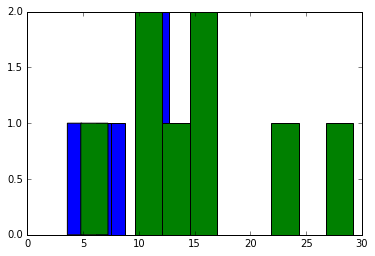

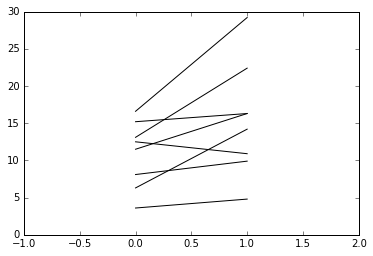

In [91]:
fig, ax = plt.subplots()
ax.hist(data_left)
_ = ax.hist(data_right)

fig, ax = plt.subplots()
ax.plot([0, 1], [data_left, data_right], color='k')
_ = plt.setp(ax, xlim=[-1, 2])

In [84]:
sm.stats.ttost_paired(data_left, data_right, 0, 0)

(0.98433675226862216,
 (-2.6846726320793439, 0.98433675226862216, 7.0),
 (-2.6846726320793439, 0.015663247731377845, 7.0))

In [85]:
diff = data_right - data_left
ttest_1samp(diff, 0)

Ttest_1sampResult(statistic=2.6846726320793435, pvalue=0.031326495462755705)

Problem 3: non-parametric tests: Wilcoxon Signed-Rank Test (one sample) and Wilcoxon-Mann-Whitney (two sample).
Refer to the data in problem 2.
1. Although we previously assumed that a paired t-test was the most appropriate test, one could argue that a paired nonparametric test would be more appropriate. Why or why not?
  > Sample size is quite small, making it difficult to assess if the data is normal. Therefore, it may be more appropriate to run a nonparmetric test.
1. Assuming a paired nonparametric test is most appropriate, is there a statistical difference in CP levels? (use wilcox.test)
wilcox.test(CP$L,CP$R,paired=T)
  > There appears to be a difference (p=0.039)
1. Let’s assume for a moment that the CP levels were collected from different spinal cords. Is the paired nonparametric test still appropriate? Why?
  > Since the data is collected from different samples (or “subjects”) we can no longer run paired tests.
1. Assuming a nonparametric 2-sample test is most appropriate, is there a statistical difference in CP levels? (use wilcox.test)
  > Just as with t-test, paired nonparametric test also tend to have more power. Therefore, not surprisingly, the 2-sample nonparametric test returns a non-significant effect (p = 0.270)


In [ ]:
#3.c
wilcox.test(data$Right.Side..control., data$Left.Side..regenerating., paired=T)

#3.d
wilcox.test(data$Right.Side..control., data$Left.Side..regenerating.)

## Problem 4: example of t-tests failing: Kolmogorov-Smirnov to the rescue
Generally speaking, parametric tests are more powerful than nonparametric tests. That’s because the conditions necessary to run a parametric test gives you some very powerful assumptions. However, there are some cases where nonparametric test can tell you more. Consider arbitrary data D1 and D2.
1. Load in and visualize the data. What can you say about the data?
    ```
	# load the data
dat = read.delim("problem4.txt", header = TRUE, fill = TRUE)
	# make the figure be two rows
	par(mfrow = c(2,1))
	# make the histograms
hist(dat$D1)
	hist(dat$D2)
	mean(dat, na.rm=T)
	sd(dat, na.rm=T)
    ```
  > The means are similar for the data (D1 = 25.4, D2 = 26.2), but the standard deviations are quite different (D1 = 7.0, D2 = 13.1)
1. What happens if you run a parametric 2-sample test? What about a non-parametric one?
    ```
	t.test(dat$D1,dat$D2)
	wilcox.test(dat$D1,dat$D2)
    ```
  > Given that the two distributions have such similar means, we are not surprised to find that these tests show that the distributions are not significantly different (t.test: p = 0.68. wilcox.test: p=0.97)
1. Now plot the data as a Cumulative Distribution Function. Although the means of the data sets are similar, their distributions definitely have a distinct shape.
```
D1=ecdf(dat$D1)
D2=ecdf(dat$D2)	
plot(D2,pch=20)
lines(D1,pch=1,lty=3)
```

1. The Kolmogorov-Smirnov test is a non-parametric test used to investigate the “shape” of a distribution. See what happens when you run a ks.test
		`ks.test(dat$D1,dat$D2)`
  > This test demonstrates that the two distributions are in fact different even though the means are so similar (p=0.031)

---

Let’s try a little computer simulation, generating “fake” random data to help us understand how often false positive can occur.
1. One trial is defined as follows: take two random samples (n = 10) from a normal distribution and run a two-sample t-test on them, taking note of the p-value. Figure out how to run a trial.
1. One experiment is 100 trials. (you should have 100 p-values at the end of an experiment). In the course of one experiment, how often are the two random samples significantly different from each other (at the level of alpha = 0.05)? Take a note of that number.
1. Run the above experiment about 100 more times… Isn’t it interesting that the number of statistically different “data sets” is always very close to 5? Why do you think this may be the case? What implications does it have for t-tests? We’ll cover this more in detail in the next few lectures.


In [ ]:
# 4.a
par(mfrow=c(1, 1))
data <- data.frame(read.xlsx('./Week 03 - data.xlsx', sheetName='problem 4', startRow=3))
boxplot(data)

#4.b
t.test(data$X25.2, data$X42.7)
wilcox.test(data$X25.2, data$X42.7)

#4.c
plot(ecdf(x=data$X25.2))
plot(ecdf(x=data$X42.7))

#4.d
ks.test(data$X25.2, data$X42.7)

#5.a
sim_pvals <- function(mn1, mn2, sd1=1, sd2=1, n_sim=1000, n_samp=10) {
  p.vals <- vector(length=n_sim)
  for (i in seq(n_sim)) {
    a <- rnorm(n_samp, mean=mn1, sd=sd1)
    b <- rnorm(n_samp, mean=mn2, sd=sd2)
    p.vals[i] <- t.test(a, b)$p.value
  }
  par(mfrow=c(1, 2))
  hist(p.vals, freq=F)
  plot(ecdf(p.vals))
}

sim_pvals(0, 0, sd1=1, sd2=1)